# Herkenning van handgeschreven cijfers met CNN

## Convolutionele Neurale Netwerken

- Minor AAI - Hogeschool van Amsterdam
- Docenten:  Michiel Bontenbal & Maarten Post
- Vrijdag 16 februari 2024

### Boek & tutorials:

**Deep Learning with Python - Francois Chollet - Chapter 8**
- https://learning-oreilly-com.rps.hva.nl/library/view/deep-learning-with/9781617296864/

**Tutorials**
- https://keras.io/examples/vision/mnist_convnet/ 
- https://www.geeksforgeeks.org/applying-convolutional-neural-network-on-mnist-dataset/ 

## Importeer libraries

In [1]:
#import libraries. Ignore a potential tensorflow warning.

#Import keras methods. Study this for a moment, as this is important
from keras import models, layers, datasets

#These are the layers in the deep learning model
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout
from keras.optimizers.legacy import Adam

#import numpy and matplotlib 
import numpy as np
import matplotlib.pyplot as plt

#import a tensorflow utensil
from tensorflow.keras.utils import to_categorical

## Verover de data

In [2]:
#load dataset from Keras and split into train and test sets
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_labels.shape

(60000,)

## Prepareer de images

* normalizeren --> pixel waardes tussen 0.0 en 1.0
* reshapen --> extra dimensie!

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_images_normalized = train_images.astype('float32')/255

In [7]:
train_images_enhanced = train_images_normalized.reshape(60000,28,28,1)

In [8]:
train_images_enhanced.shape

(60000, 28, 28, 1)

The label is: 5


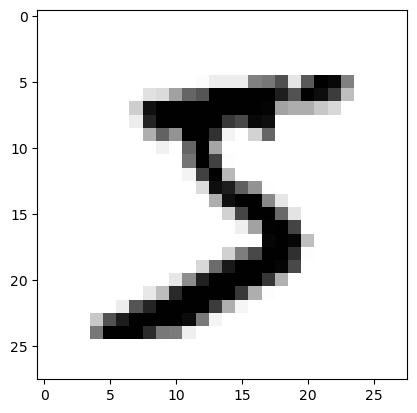

In [9]:
#show the first image
import matplotlib.pyplot as plt
image = train_images[0]
plt.imshow(image, cmap=plt.cm.binary)
plt.show
print(f'The label is: {train_labels[0]}')

In [10]:
#Check the pixelvalues of the image
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### Oefening 1: Doe hetzelfde met de test images als wat hierboven met de train images is gedaan.

In [11]:
# YOUR CODE HERE
test_images_normalized = test_images.astype('float32')/255

In [12]:
# YOUR CODE HERE
test_images_enhanced  = test_images_normalized.reshape(10000,28,28,1)

In [13]:
# YOUR CODE HERE
test_images_enhanced.shape

(10000, 28, 28, 1)

## Prepareer de labels

### OEFENING 2: Zet de labels om naar vectoren met 'one-hot encoding'. 

One-hot encoding of ook wel categorical-encoding wordt gebruikt om van het label (een categorie) een 1D-array (vector) te maken. 

Lees eventueel meer door te zoeken op www.phind.com

Hint: zoek op ```to_categorical``` in de keras documentatie.

In [14]:
# Encoding the labels
# train_labels = to_categorical(train_labels)
# test_labels = to_categorical(test_labels)

In [15]:
# YOUR CODE HERE
train_labels_encoded = to_categorical(train_labels) 
test_labels_encoded = to_categorical(test_labels)

In [16]:
train_labels_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [17]:
test_labels_encoded

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

We hebben nu de data voorbereidt, door het te normaliseren en door de labels encoden. Dit is noodzakelijk voor een CNN model, omdat het alleen omgaat met nummers en geen categorische data.

## Maak het CNN-model

### OEFENING 3: voeg nog 1 Conv2D + Pooling toe en nog 1 Dense laag toe

In [18]:
cnn = models.Sequential()

cnn.add(Conv2D(filters=32,
                  kernel_size=(3, 3),
                  activation='relu', 
                  input_shape=(28,28,1)))

cnn.add(MaxPooling2D(pool_size=(2, 2)))

#YOUR CODE EDIT HERE
cnn.add(Conv2D(filters=64,
                  kernel_size=(3, 3),
                  activation='relu'))

cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Flatten())
cnn.add(Dropout(0.5))

# YOUR CODE EDIT HERE
cnn.add(Dense(units=64, activation='relu'))

cnn.add(Dense(units=64, activation='relu'))
cnn.add(Dense(units=10, activation = 'softmax'))

In [19]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [20]:
cnn.compile(optimizer='adam',
            metrics = ['accuracy'],
            loss = 'categorical_crossentropy')

### Oefening 4: meet hoe lang het trainen duurt

Hier hebben jullie vorige week voorbeeld code voor gekregen, zoek dat nog eens na als je dat vergeten bent.


In [29]:
import time
# YOUR CODE EDITS HERE
# Calculate the time it takes to train the model
%timeit
history_cnn = cnn.fit(train_images_enhanced,
        train_labels_encoded,
        epochs = 7, # varieer het aantal epochs
        batch_size = 128,
        validation_data = (test_images_enhanced, test_labels_encoded))


Epoch 1/7
469/469 [==============================] - 21s 44ms/step - loss: 0.0310 - accuracy: 0.9900 - val_loss: 0.0229 - val_accuracy: 0.9918
Epoch 2/7
469/469 [==============================] - 22s 46ms/step - loss: 0.0303 - accuracy: 0.9903 - val_loss: 0.0245 - val_accuracy: 0.9919
Epoch 3/7
469/469 [==============================] - 25s 53ms/step - loss: 0.0259 - accuracy: 0.9914 - val_loss: 0.0232 - val_accuracy: 0.9926
Epoch 4/7
469/469 [==============================] - 24s 50ms/step - loss: 0.0261 - accuracy: 0.9919 - val_loss: 0.0255 - val_accuracy: 0.9926
Epoch 5/7
469/469 [==============================] - 20s 42ms/step - loss: 0.0244 - accuracy: 0.9921 - val_loss: 0.0212 - val_accuracy: 0.9929
Epoch 6/7
469/469 [==============================] - 21s 45ms/step - loss: 0.0210 - accuracy: 0.9930 - val_loss: 0.0223 - val_accuracy: 0.9931
Epoch 7/7
469/469 [==============================] - 21s 45ms/step - loss: 0.0209 - accuracy: 0.9933 - val_loss: 0.0209 - val_accuracy: 0.9937

In [30]:
# do the testing
loss, acc = cnn.evaluate(test_images_enhanced,
                         test_labels_encoded)
print(acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0209 - accuracy: 0.9937
0.9937000274658203


### OEFENING 5: voeg labels aan deze grafiek toe

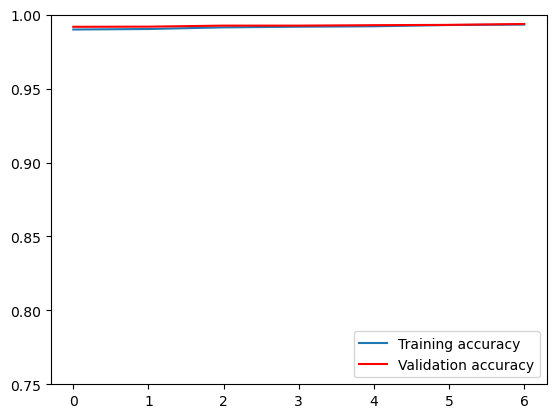

In [31]:
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'],'r')
plt.legend(['Training accuracy', 'Validation accuracy'], loc='lower right')
plt.ylim(0.75,1.0)
plt.show()

313/313 [==============================] - 1s 2ms/step


Text(113.9222222222222, 0.5, 'true value')

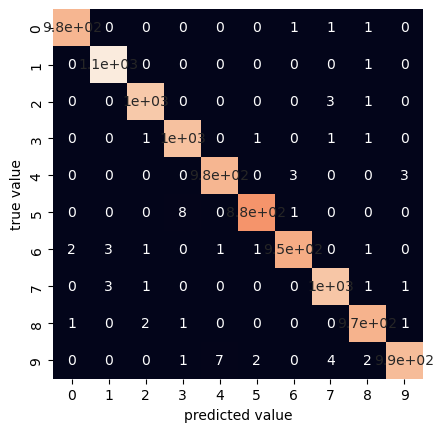

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create a confusion matrix
cm = confusion_matrix(np.argmax(test_labels_encoded, 1), np.argmax(cnn.predict(test_images_enhanced), 1))

# Plot the confusion matrix
sns.heatmap(cm, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

**OPDRACHT**: evalueer je resultaten:

* hoe is de nauwkeurigheid?
De Accuracy van dit CNN model is: 0.9883
* is het netwerk onder- of over-trained?
Met 3 epochs is het model onder-trained, dit kan je zien aan de grafiek. Hier in zie je dat de accuracy of de training data niet hoger is dat je validatie accuracy. Dit betekend dat er nog ruimte is om te groeien op de training data. Hoewel je hier wel mee moet uitkijken, want anders train je te sterk op de training data en dan heb je last van overfitting.
* laat een paar fouten zien
In de confusion matrix zie je dat 4 en 9 vaak fout worden voorspeld. 
* wat kun je zeggen over de aard van de fouten?
Dit komt omdat ze allebei ongeveer dezelfde structuur hebben. En door conv2d en pooling, kunnen deze features bij elkaar komen, waardoor het model weinig onderscheidt ziet tussen 4 en 9.
* wat is sneller: het trainen of het testen?
Het testen van de data is veel sneller. Het testen duurde maar 2 seconden, terwijl bij het trainen, ±22 seconden over deed per epoch, dus dat is bijna een minuut aan trainen.
* wat kun je nog doen om de nauwkeurigheid te verhogen?
meer epochs toevoegen om misschien iets langer te trainen.

(noteer de veranderingen die je hebt aangebracht en wat daar de resultaten van zijn)
* Met 5 epochs is de accuracy van 0.9883 naar  0.9922 gegaan, dat is zo'n ±1% meer! Als je nu weer een grafiek tekend zie je dat de 2 lijnen  meer op elkaar zitten, maar de training lijn is nog niet boven de validatie lijn, misschien is er nog meer ruimte voor verbetering. Mischien nog 1 of 2 epcohs toevoegen.
* En inderdaad met 7 epochs is de accuracy omhoog gegaan naar 0.9937000%. Nu zie je ook in de grafiek dat de lijnen op elkaar lopen, dus er is geen ruimte meer voor verbetering.

## To do: evalueer cijferherkenning met kNN, NN, en CNN

**OPDRACHT**: evalueer je resultaten:

vergelijk de resultaten van kNN, NN, en CNN
- KNN: 91%
- NN: 97.79%
- CNN: 99.37%

* wat concludeer je hieruit?
Een KNN model heeft hier de laagste accuracy wat logisch is, omdat het een relatief simpel model is. NN en CNN zijn neurala netwerken, die werken met neuronen in lagen. NN was een model met alleen maar dense layers, een relatief simpel model. CNN daarin tegen hebben meer lagen en ook meer parameters waarmee je de data veel beter mee kan leren. Dit wordt ook gereflecteerd in de resultaten. CNN kunnen ook beter vormen herkennen, wat dus ook handig is voor het herkennen van nummers, NN hebben dit niet van hun zelf.
* welke type fouten maken de verschillende classifiers?
KNN Maakte vooral fouten bij de 1 en 7, omdat die allebei een lange lijn hadden, en ze daarom niet uitelkaar kon halen.    
Bij het CNN model werde meer complexere fouten gemaakt. Hier maakte het vaak de fout tussen 4 en 9, Dit komt omdat deze ongeveer de zelfde features hebben: een lange rechte steel, en daarop een rondje(ongeveer).
Bij een 4 is het rondje soms open en soms dicht, en daarom kan het op een 9 lijken, vooral voor een CNN model zoals deze.





### To do: Upload de notebooks naar je Gitlab, maak een aantekening in je logboek, werk Bloom-tabel bij.